# Analisando o Dataset


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_json("clean_dataset.json")

### Executando as queries
---

In [127]:
sairam = dataset.query("deixou_empresa == 'Sim'")
ficaram = dataset.query("deixou_empresa == 'Nao'")

sairam_telefone = sairam.query("servico_telefone == 'Sim' and servico_internet == 'Nao'")
sairam_internet = sairam.query("servico_telefone != 'Sim' and servico_internet != 'Nao'")
sairam_ambos = sairam.query("servico_telefone == 'Sim' and servico_internet != 'Nao'")

sairam_idosos = sairam.query("idoso == 1")
sairam_adultos = sairam.query("idoso == 0")

sairam_relacionamento = sairam.query("em_relacionamento == 'Sim'")
sairam_solteiro = sairam.query("em_relacionamento == 'Nao'")

total_telefone = dataset.query("servico_telefone == 'Sim' and servico_internet == 'Nao'")
total_internet = dataset.query("servico_telefone != 'Sim' and servico_internet != 'Nao'")
total_ambos = dataset.query("servico_telefone == 'Sim' and servico_internet != 'Nao'")

total_idosos = dataset.query("idoso == 1")
total_adultos = dataset.query("idoso == 0")

total_relacionamento = dataset.query("em_relacionamento == 'Sim'")
total_solteiro = dataset.query("em_relacionamento == 'Nao'")

## Análises Iniciais com o Churn
---

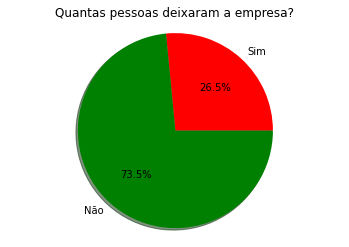

In [128]:
labels = ['Sim', 'Não']
colors = ['red', 'green']

figure, ax = plt.subplots()
figure.set_facecolor("white")
ax.pie([len(sairam), len(ficaram)], labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)
ax.set_title("Quantas pessoas deixaram a empresa?")
ax.axis('equal')
plt.show()

#### Serviços Utilizados
---

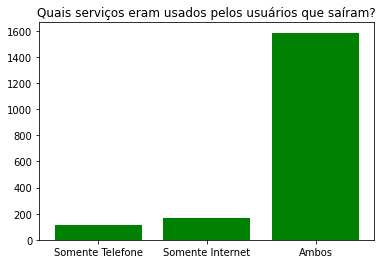

In [129]:
labels = ['Somente Telefone', 'Somente Internet', 'Ambos']
values = [len(sairam_telefone), len(sairam_internet), len(sairam_ambos)]
plt.bar(labels, values, color='green')
plt.title("Quais serviços eram usados pelos usuários que saíram?")
plt.show()

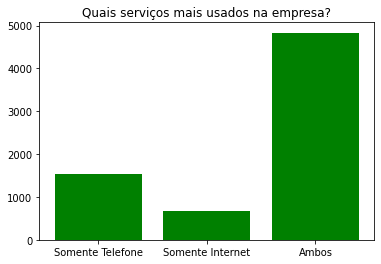

In [130]:
labels = ['Somente Telefone', 'Somente Internet', 'Ambos']
values = [len(total_telefone), len(total_internet), len(total_ambos)]
plt.bar(labels, values, color='green')
plt.title("Quais serviços mais usados na empresa?")
plt.show()

#### Estado Civil
----

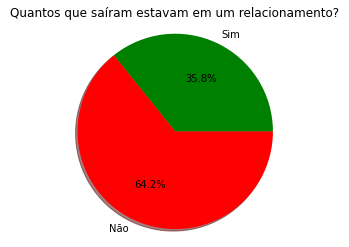

In [131]:
labels = ['Sim', 'Não']
colors = ['green', 'red']

figure, ax = plt.subplots()
figure.set_facecolor("white")
ax.pie([len(sairam_relacionamento), len(sairam_solteiro)], labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)
ax.set_title("Quantos que saíram estavam em um relacionamento?")
ax.axis('equal')
plt.show()

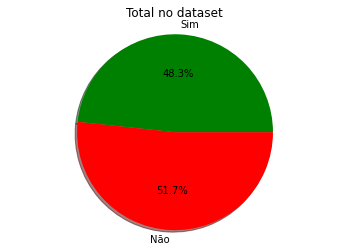

In [135]:
labels = ['Sim', 'Não']
colors = ['green', 'red']

figure, ax = plt.subplots()
figure.set_facecolor("white")
ax.pie([len(total_relacionamento), len(total_solteiro)], labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)
ax.set_title("Total no dataset")
ax.axis('equal')
plt.show()

#### Idosos
---

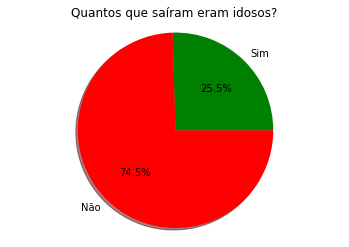

In [132]:
labels = ['Sim', 'Não']
colors = ['green', 'red']

figure, ax = plt.subplots()
figure.set_facecolor("white")
ax.pie([len(sairam_idosos), len(sairam_adultos)], labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)
ax.set_title("Quantos que saíram eram idosos?")
ax.axis('equal')
plt.show()

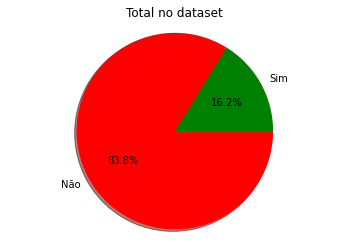

In [133]:
labels = ['Sim', 'Não']
colors = ['green', 'red']

figure, ax = plt.subplots()
figure.set_facecolor("white")
ax.pie([len(total_idosos), len(total_adultos)], labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)
ax.set_title("Total no dataset")
ax.axis('equal')
plt.show()

#### Conclusões: 
##### Cerca de 1/4 dos usuários deixaram a empresa, denominando uma retenção de quase 75%. 
##### A respeito das características dos clientes que deixaram a empresa, podemos notar uma tendência (visual) aos idosos cancelarem seus contratos mais frequentemente, bem como as pessoas solteiras, se comparado ao nosso conjunto total de dados. Em relação aos serviços, nenhum em específico aparenta ser decisivo para a saída de clientes.

## Analisando Período de Contrato e Custo Mensal
---

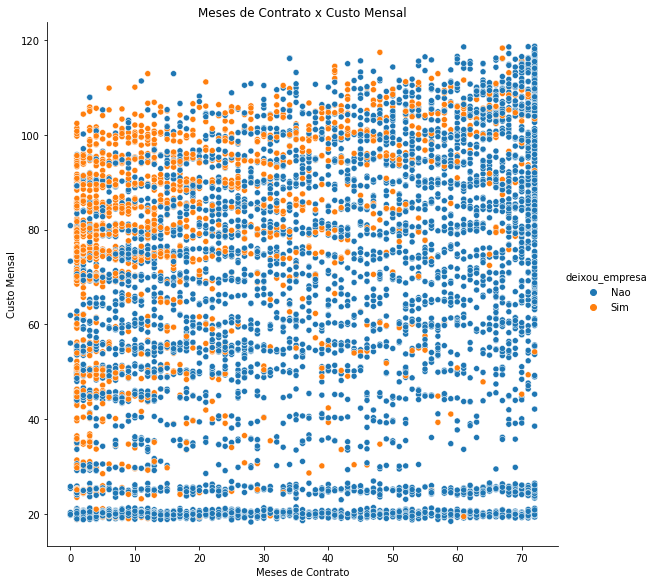

In [179]:
graph = sns.relplot(x = "meses_contratado", y = "custo_mensal", 
                    data=dataset, hue="deixou_empresa", height=8)
graph.set_axis_labels("Meses de Contrato", "Custo Mensal")
graph.set(title = "Meses de Contrato x Custo Mensal")

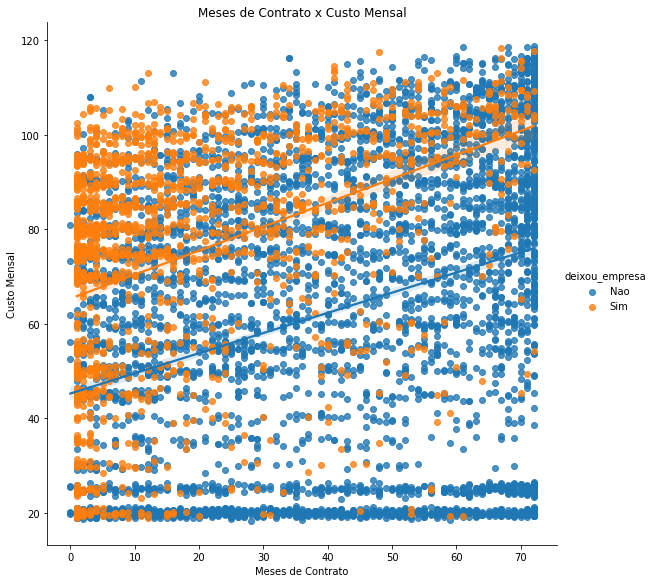

In [180]:
graph = sns.lmplot(x = "meses_contratado", y = "custo_mensal", 
                    data=dataset, hue="deixou_empresa", height = 8)
graph.set_axis_labels("Meses de Contrato", "Custo Mensal")
graph.set(title = "Meses de Contrato x Custo Mensal")

#### Custo Acumulado
---

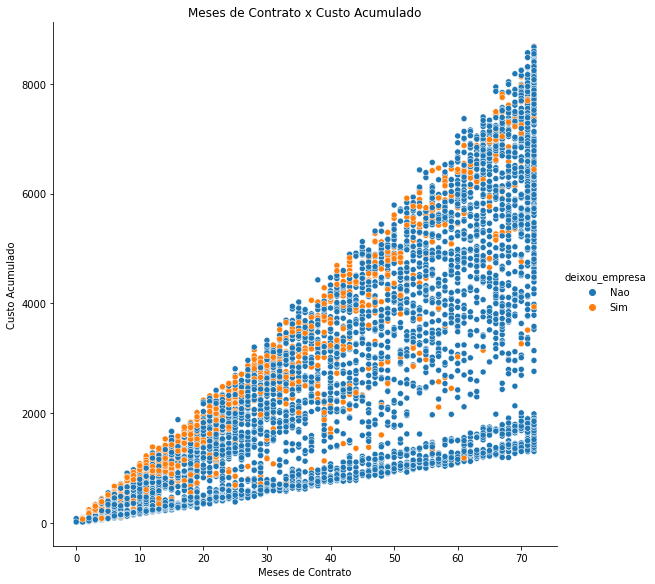

In [181]:
graph = sns.relplot(x = "meses_contratado", y = "custo_ate_entao", 
                    data=dataset, hue="deixou_empresa", height=8)
graph.set_axis_labels("Meses de Contrato", "Custo Acumulado")
graph.set(title = "Meses de Contrato x Custo Acumulado")

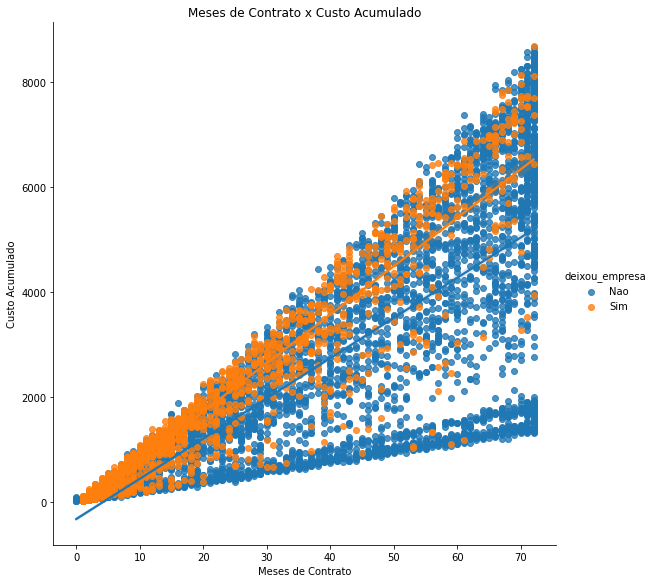

In [182]:
graph = sns.lmplot(x = "meses_contratado", y = "custo_ate_entao", 
                    data=dataset, hue="deixou_empresa", height=8)
graph.set_axis_labels("Meses de Contrato", "Custo Acumulado")
graph.set(title = "Meses de Contrato x Custo Acumulado")

#### Custo Diário
---

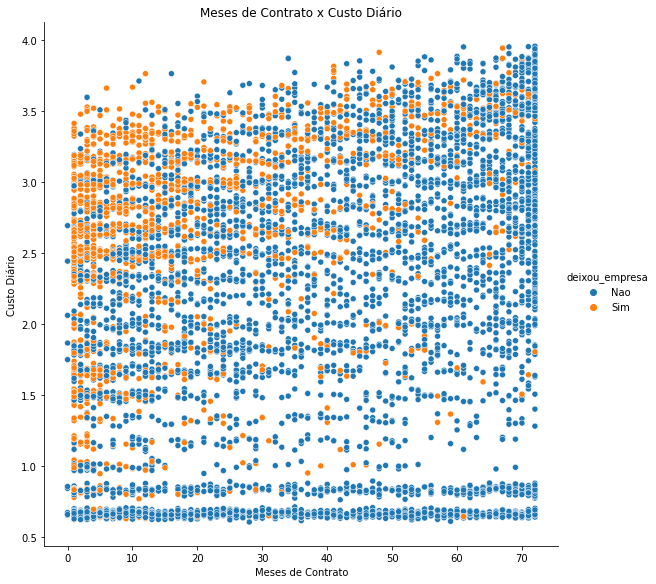

In [183]:
graph = sns.relplot(x = "meses_contratado", y = "custo_diario", 
                    data=dataset, hue="deixou_empresa", height=8)
graph.set_axis_labels("Meses de Contrato", "Custo Diário")
graph.set(title = "Meses de Contrato x Custo Diário")

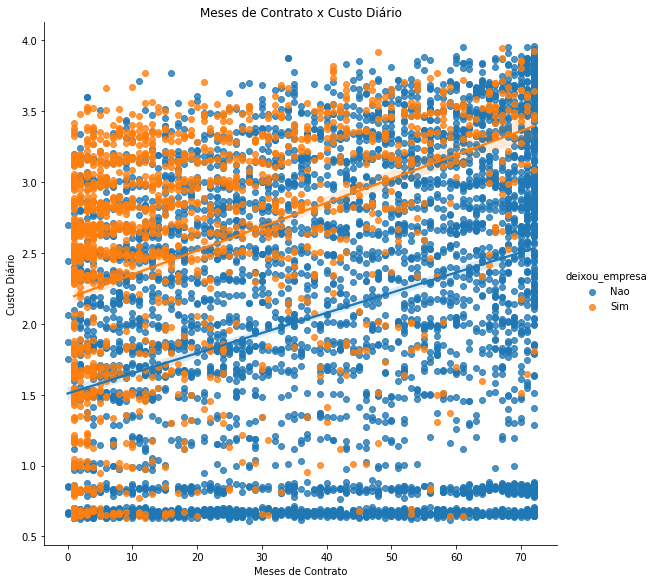

In [184]:
graph = sns.lmplot(x = "meses_contratado", y = "custo_diario", 
                    data=dataset, hue="deixou_empresa", height=8)
graph.set_axis_labels("Meses de Contrato", "Custo Diário")
graph.set(title = "Meses de Contrato x Custo Diário")

#### Conclusões: 
##### Analisando as regressões lineares, é evidente que a linha representando aqueles que escolheram não assinar mais os serviços não só é mais acentuada em comparação ao outro caso, como tem início bem acima. A grande densidade de casos de saída na parte superior esquerda também é outro indicativo de que, apesar de não ser a regra geral, uma quantidade significativa de clientes cancelou seu contrato precocemente devido ao alto custo mensal. Ou seja, existe uma tendência na qual, quanto maior o custo mensal, menor serão os meses de contrato.
##### Por outro lado, clientes "fiéis" tendem a ter um maior período de contrato, com alta densidade próximo aos 70 meses.
##### Também pode-se notar que o grau de desistência no gráfico anual é muito mais acentuado nos primeiros meses. Isso demonstra a tendência das pessoas de se esquecerem da quantia de dinheiro que já gastaram a muito tempo, e como pode ser vantajoso abordar uma estratégia baixo custo e longo prazo em nossas ofertas.

## Analisando Tipo de Contrato
---

#### Tendo em mente a tendência de clientes "fiéis" se manterem com os serviços assinados por mais tempo, veremos a relação dos meses de contrato com o tipo de contrato

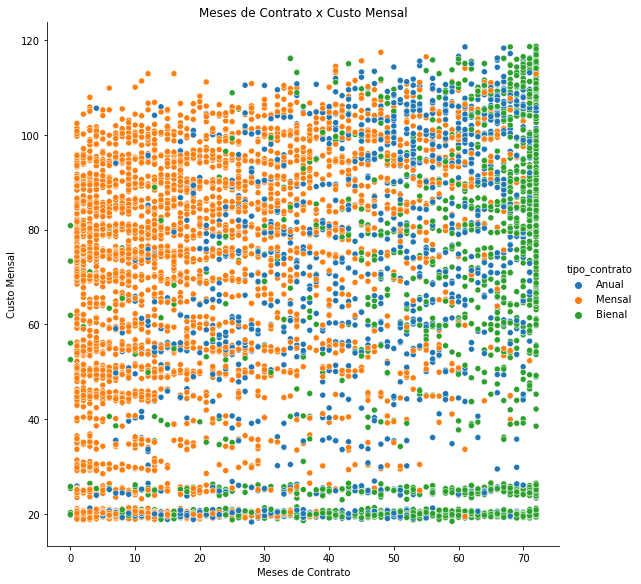

In [186]:
graph = sns.relplot(x = "meses_contratado", y = "custo_mensal", 
                    data=dataset, hue="tipo_contrato", height=8)
graph.set_axis_labels("Meses de Contrato", "Custo Mensal")
graph.set(title = "Meses de Contrato x Custo Mensal")

#### Conclusões: 
##### A grande densidade de planos bienais e anuais quanto maior os meses de contrato somente reforça a ideia de uma abordagem de longo prazo. Se o objetivo é reter clientes, tentar mudar seus planos para contratos de longo prazo é a abordagem mais efetiva. Pouquíssimos contratos mensais passam dos 48 meses, e a grande maioria dos contratos bienais conseguem passar essa margem.

## Análises Finais
---

#### Por fim, analisaremos outros detalhes, tais como formas de pagamento e tipo de internet, buscando analisar seu impacto na decisão de recisão da assinatura.

In [212]:
cheque_email = sairam.query("forma_pagamento == 'Cheque por Email'")
cheque_eletronico = sairam.query("forma_pagamento == 'Cheque Eletronico'")
cartao_auto = sairam.query("forma_pagamento == 'Cartao de Credito (auto)'")
transferencia_auto = sairam.query("forma_pagamento == 'Transferencia Bancaria (auto)'")

pagamento_fisico = sairam.query("pagamento_online == 'Nao'")
pagamento_online = sairam.query("pagamento_online == 'Sim'")

fibra = sairam.query("servico_internet == 'Fibra Optica'")
dsl = sairam.query("servico_internet == 'DSL'")


total_cheque_email = dataset.query("forma_pagamento == 'Cheque por Email'")
total_cheque_eletronico = dataset.query("forma_pagamento == 'Cheque Eletronico'")
total_cartao_auto = dataset.query("forma_pagamento == 'Cartao de Credito (auto)'")
total_transferencia_auto = dataset.query("forma_pagamento == 'Transferencia Bancaria (auto)'")

total_pagamento_fisico = dataset.query("pagamento_online == 'Nao'")
total_pagamento_online = dataset.query("pagamento_online == 'Sim'")

total_fibra = dataset.query("servico_internet == 'Fibra Optica'")
total_dsl = dataset.query("servico_internet == 'DSL'")

#### Tipo de Contrato
---

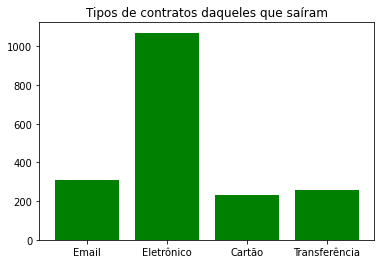

In [202]:
labels = ['Email', 'Eletrônico', 'Cartão', 'Transferência']
values = [len(cheque_email), len(cheque_eletronico), 
          len(cartao_auto), len(transferencia_auto)]
plt.bar(labels, values, color='green')
plt.title("Tipos de contratos daqueles que saíram")
plt.show()

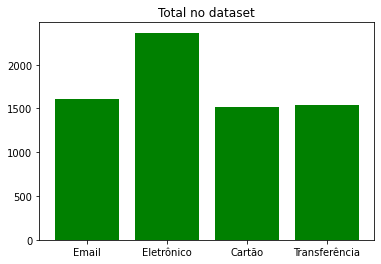

In [199]:
labels = ['Email', 'Eletrônico', 'Cartão', 'Transferência']
values = [len(total_cheque_email), len(total_cheque_eletronico), 
          len(total_cartao_auto), len(total_transferencia_auto)]
plt.bar(labels, values, color='green')
plt.title("Total no dataset")
plt.show()

#### Pagamento Online
---

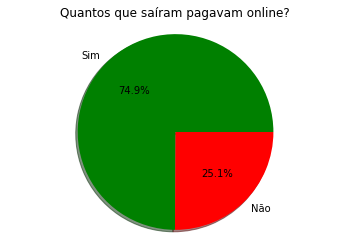

In [207]:
labels = ['Sim', 'Não']
colors = ['green', 'red']

figure, ax = plt.subplots()
figure.set_facecolor("white")
ax.pie([len(pagamento_online), len(pagamento_fisico)], labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)
ax.set_title("Quantos que saíram pagavam online?")
ax.axis('equal')
plt.show()

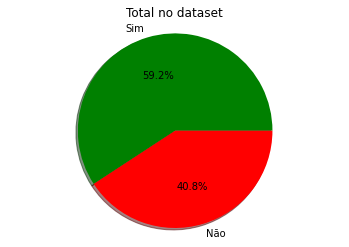

In [208]:
labels = ['Sim', 'Não']
colors = ['green', 'red']

figure, ax = plt.subplots()
figure.set_facecolor("white")
ax.pie([len(total_pagamento_online), len(total_pagamento_fisico)], labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)
ax.set_title("Total no dataset")
ax.axis('equal')
plt.show()

#### Tipo de Internet
---

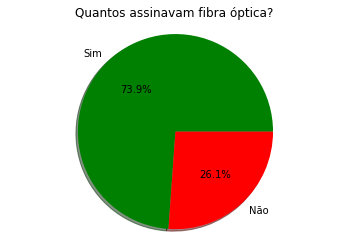

In [213]:
labels = ['Sim', 'Não']
colors = ['green', 'red']

figure, ax = plt.subplots()
figure.set_facecolor("white")
ax.pie([len(fibra), len(dsl)], labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)
ax.set_title("Quantos assinavam fibra óptica?")
ax.axis('equal')
plt.show()

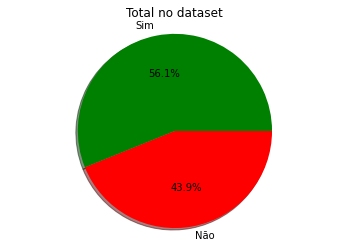

In [214]:
labels = ['Sim', 'Não']
colors = ['green', 'red']

figure, ax = plt.subplots()
figure.set_facecolor("white")
ax.pie([len(total_fibra), len(total_dsl)], labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)
ax.set_title("Total no dataset")
ax.axis('equal')
plt.show()

# Considerações Finais
---

##### Considerando os dados levantados, a retenção de usuários da empresa beira os 75%. Caso a compania deseje aumentar esse valor, deve atentar-se para algumas tendências.
##### A primeira de todas as tendências diz respeito a duração do contrato. Contratos longos, (anuais e bienais) tendem a trazer clientes de longo-prazo, independente do custo mensal. Logo, tentar convencer clientes a adotarem tais planos o mais cedo possível é uma estratégia válida.
##### A respeito dos serviços em si, é fato que o custo inicial é um fato decisivo para a maioria dos clientes, principalmente nos primeiros 12 meses. Uma abordagem interessante seria oferecer um contrato longo, com custos iniciais baixos, que aumentam com o passar do tempo. Além disso, manter a qualidade do serviço estável. Os dados mostram que, contanto que o cliente adote os planos a longo prazo e confie na compania, dificilmente o mesmo se importará com o preço. Seria pertinente, então, convencer o cliente de nosso valor com preços mais baixos nos primeiros meses, e depois ir aumentando aos poucos.

##### Uma última análise pode ser feita a respeito dos idosos. É comprovado que a maioria dos clientes que deixam a empresa são mais novos ou mais "tecnológicos", como pode ser visto pelo perfil dos serviços empregados pelos desistentes. Um foco voltado para a população mais idosa pode retornar grandes quantidades de clientes fiéis.

##### Como observação final, uma análise a respeito dos pagamentos de cheque eletrônico é valida. Muitos dos desistentes usavam esse método, e, mesmo que o mesmo seja o mais proeminente em nosso dados, a porcentagem é bastante alta.